In [2]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd


plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/statsmodels/tools/tools.py:6: UserWarning: A NumPy version >=1.22.4 and <1.29.0 is required for this version of SciPy (detected version 1.22.0)
  import scipy.linalg


In [3]:
age_bin_list = ["0-60", "60-65", "65-70"]

test_imputed = pd.read_pickle("result/part1/test_imputed.pkl")
proteomics = test_imputed.columns[test_imputed.columns.tolist().index("C3") :].tolist()
proteomics

['C3',
 'KLK7',
 'GCHFR',
 'NHLRC3',
 'APOD',
 'GAPDH',
 'TP53I3',
 'CPA4',
 'ANXA2',
 'GRSF1',
 'IL25',
 'HMMR',
 'MRPL52',
 'PAIP2B',
 'THAP12',
 'FOS',
 'FGF9',
 'PITHD1',
 'THSD1',
 'PTGES2',
 'DEFB103A_DEFB103B',
 'ATP1B4',
 'CYB5A',
 'UNC79',
 'SLC34A3',
 'TAGLN3',
 'SLIRP',
 'CLASP1',
 'PSMC3',
 'KIR3DL2',
 'BEX3',
 'PFDN4',
 'BCL7A',
 'SMC3',
 'SLC28A1',
 'CDC123',
 'GJA8',
 'NMRK2',
 'GATA3',
 'CPLX2',
 'RASGRF1',
 'FGF7',
 'ANKRA2',
 'RBM25',
 'LYZL2',
 'CDK1',
 'CREB3',
 'CREBZF',
 'IGLON5',
 'SHC1',
 'ZP4',
 'TMOD4',
 'CEP152',
 'MYH7B',
 'CEP350',
 'CDC25A',
 'TRIM26',
 'MANEAL',
 'MUCL3',
 'GIMAP8',
 'CYTH3',
 'PDXDC1',
 'CLINT1',
 'MAPRE3',
 'EVI2B',
 'STAU1',
 'PCNA',
 'DNAJA1',
 'JMJD1C',
 'GAGE2A',
 'GAD1',
 'IZUMO1',
 'PDCL2',
 'PDE1C',
 'STOML2',
 'BSND',
 'MAPK13',
 'PDIA2',
 'BTLA',
 'MLLT1',
 'TPRKB',
 'ARHGAP5',
 'BTNL10',
 'PHLDB2',
 'PDIA5',
 'ATF4',
 'PRAME',
 'TOP1MT',
 'KHDC3L',
 'DCUN1D2',
 'IL3',
 'DCLRE1C',
 'ERCC1',
 'DCDC2C',
 'VCPKMT',
 'SPRING1',
 'M

In [4]:
test_score = pd.read_csv("result/part2/test_score.csv")
test_score["age_bin"] = pd.cut(
    test_score["age"],
    bins=[0, 60, 65, 70],
    labels=age_bin_list,
)
test_score.groupby(["age_bin"]).value_counts(["incident_cad"])
test_score

,eid,PRS,sex,height,weight,BSA,genotype_array,age,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,assessment_center,age_squared,BMI,dbp_a,sbp_a,tc_a,tg_a,hdl_a,ldl_a,dbp,sbp,tc,tg,hdl,ldl,apob,cad,mi,crp,eGFR,Cr,CAD,cad_date,birth_date,recuit_date,death_date,cad_age,death_age,recuit_age,year_of_cad_after_recuit,survival_time,is_earily_CAD,incident_cad,cad_status,prevalent_cad,smoking,prevalent_diabetes,Arrhythmia,Stroke,Peripheral_vascular_disease,Hypertension,future_cad_time_days,future_cad_time_months,future_cad_time_years,proteomicsRS,SigAssocRS,EnsembleProtRS,PRS + RF,PRS + AS,SigAssocRS + RF,SigAssocRS + AS,SigAssocRS + RF + PRS,proteomicsRS + RF,proteomicsRS + AS,proteomicsRS + RF + PRS,EnsembleProtRS + RF,EnsembleProtRS + AS,EnsembleProtRS + RF + PRS,RF,AS,RF_without_AS,age_bin
0,2883530.0,1.030583,1.0,171.0,64.2,1.746282,2,44.0,71.3002,-100.66700,81.855800,9.994410,-0.516576,4.576150,1.832860,5.045020,1.614310,18.488800,4,1936.0,21.9555,76.0,115.000000,5.851000,0.893000,1.635000,3.549000,76.0,115.0,5.851,0.893,1.635,3.549,1.002,0,0,0.48,112.310853,69.9,0,NaN,1965-07-01,2010-06-18,NaN,NaN,NaN,44.994521,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0,0,0,0,5045 days 10:14:40.562038,169.0,14.0,0.067694,0.118559,0.074782,0.004710,0.043320,0.107093,0.118591,0.111727,0.066771,0.068603,0.070986,0.080357,0.076001,0.084278,-0.003829,0.039190,9.517893,0-60
1,2867444.0,2.192278,0.0,165.0,55.8,1.599219,2,53.0,-12.4815,3.16181,-3.999700,0.309314,-6.865420,-1.982800,-1.245250,1.828070,-4.040440,-0.823290,11,2809.0,20.4959,100.0,150.000000,7.407000,3.176000,1.415000,4.840000,100.0,150.0,7.407,3.176,1.415,4.840,1.433,0,0,1.32,82.185961,74.9,0,NaN,1955-11-01,2009-04-15,NaN,NaN,NaN,53.490411,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0,0,0,0,5474 days 10:14:40.547041,183.0,15.0,0.034012,0.069739,0.076758,0.082868,0.087514,0.074116,0.065538,0.123503,0.042133,0.031046,0.093734,0.089410,0.078090,0.133772,0.022978,0.019502,11.872159,0-60
2,5869793.0,0.653794,1.0,171.0,77.3,1.916181,2,62.0,-11.4721,2.20519,0.205421,-1.035540,-2.391010,-2.383070,0.886641,-0.934631,1.414580,1.704540,9,3844.0,26.4355,81.0,144.000000,5.909000,1.869000,1.670000,3.587000,81.0,144.0,5.909,1.869,1.670,3.587,1.025,0,0,1.93,85.913239,87.7,0,NaN,1947-10-01,2010-01-19,NaN,NaN,NaN,62.345205,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0,0,0,0,5195 days 10:14:43.101214,174.0,15.0,0.069303,0.068507,0.085926,0.054371,0.080166,0.064285,0.071763,0.051206,0.066977,0.070396,0.052764,0.085088,0.087784,0.073206,0.069679,0.103383,11.948630,60-65
3,4880838.0,0.664819,0.0,163.0,84.4,1.954852,2,62.0,-11.1640,3.66252,-5.106300,2.058800,0.185104,-1.089780,0.567691,-2.982090,-11.959100,-1.167040,12,3844.0,31.7663,87.0,128.000000,5.603000,1.184000,1.451221,3.394000,87.0,128.0,5.603,1.184,NaN,3.394,1.029,0,0,3.57,71.698114,80.1,0,NaN,1945-06-01,2008-05-28,NaN,NaN,NaN,63.032877,NaN,NaN,NaN,0.0,control,0.0,1.0,0.0,0,0,0,0,5796 days 10:14:42.268467,194.0,16.0,0.009363,0.016679,-0.055559,0.032731,0.033944,0.010047,0.014954,-0.004025,-0.008451,0.003562,-0.021815,-0.074932,-0.061814,-0.085979,0.046213,0.051599,11.212028,60-65
4,3987428.0,0.826465,0.0,164.0,73.1,1.824859,1,66.0,-11.4666,2.77498,-0.076815,1.956800,-3.117790,1.036540,-0.677142,-1.716000,-5.479400,1.998590,8,4356.0,27.1788,82.0,124.000000,5.887954,1.797038,1.451221,3.752458,82.0,124.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,1942-07-01,2009-03-30,NaN,NaN,NaN,66.791781,NaN,NaN,NaN,0.0,control,0.0,0.0,0.0,0,0,0,0,5490 days 10:14:41.520976,183.0,16.0,0.105304,0.171897,0.149259,0.039309,0.055324,0.155225,0.165760,0.147256,0.102883,0.110538,0.095046,0.154897,0.154750,0.148183,0.047785,0.065864,10.562647,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15427,5241912.0,1.085083,1.0,176.0,116.0,

In [ ]:
train_impute = pd.read_pickle("result/part1/train_imputed.pkl")
train_impute["age_bin"] = pd.cut(
    train_impute["age"],
    bins=[0, 60, 65, 70],
    labels=age_bin_list,
)


train_impute.groupby(["age_bin"]).value_counts(["incident_cad"])
train_age_bin_dist = train_impute.groupby(["age_bin"]).value_counts(["incident_cad"])
train_age_bin_dict = train_age_bin_dist.to_dict()
train_age_bin_dict

In [26]:
from ppp_prediction.corr import cal_binary_metrics_bootstrap

method_list = ["proteomicsRS"]

result_dict = []
for method in method_list:
    for age_bin in age_bin_list:
        to_cal = test_score[test_score["age_bin"] == age_bin]
        res = cal_binary_metrics_bootstrap(
            to_cal["incident_cad"],
            to_cal["proteomicsRS"],
            ci_kwargs={"n_resamples": 100},
        )
        res["age_bin"] = age_bin
        res["method"] = method
        res["n_case"] = train_impute["incident_cad"].sum()
        res["n_control"] = train_impute.shape[0] - train_impute["incident_cad"].sum()
        result_dict.append(res)
result = pd.DataFrame(result_dict)
result

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,age_bin,method,n_case,n_control
0,0.762503,0.789804,0.734861,0.650462,0.661325,0.641842,0.451721,0.459621,0.442113,0.757576,0.810529,0.719462,0.646928,0.657340,0.637045,0.146607,0.175900,0.115612,0-60,proteomicsRS,1999.0,34008.0
1,0.743995,0.777600,0.714917,0.659462,0.673767,0.644486,0.511122,0.525534,0.497063,0.702509,0.760280,0.664138,0.655856,0.674322,0.640829,0.215145,0.250306,0.170708,60-65,proteomicsRS,1999.0,34008.0
2,0.730915,0.770607,0.694667,0.805545,0.820861,0.791475,0.615150,0.642062,0.592701,0.501946,0.563659,0.434858,0.839947,0.853269,0.828570,0.276219,0.326756,0.217109,65-70,proteomicsRS,1999.0,34008.0


In [27]:
result

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,age_bin,method,n_case,n_control
0,0.762503,0.789804,0.734861,0.650462,0.661325,0.641842,0.451721,0.459621,0.442113,0.757576,0.810529,0.719462,0.646928,0.657340,0.637045,0.146607,0.175900,0.115612,0-60,proteomicsRS,1999.0,34008.0
1,0.743995,0.777600,0.714917,0.659462,0.673767,0.644486,0.511122,0.525534,0.497063,0.702509,0.760280,0.664138,0.655856,0.674322,0.640829,0.215145,0.250306,0.170708,60-65,proteomicsRS,1999.0,34008.0
2,0.730915,0.770607,0.694667,0.805545,0.820861,0.791475,0.615150,0.642062,0.592701,0.501946,0.563659,0.434858,0.839947,0.853269,0.828570,0.276219,0.326756,0.217109,65-70,proteomicsRS,1999.0,34008.0


{('0-60', 0.0): 21131,
 ('0-60', 1.0): 777,
 ('60-65', 0.0): 7853,
 ('60-65', 1.0): 614,
 ('65-70', 0.0): 5024,
 ('65-70', 1.0): 608}

In [28]:
test_impute = pd.read_pickle("result/part1/test_imputed.pkl")

test_impute["age_bin"] = pd.cut(
    test_impute["age"],
    bins=[0, 60, 65, 70],
    labels=age_bin_list,
)
test_impute.groupby(["age_bin"]).value_counts(["incident_cad"])
test_impute

lasso_dir = "/home/xutingfeng/ukb/project/ppp_prediction/result/part4/3_age_specific_prediction/model/model_lasso"

age_bin_refit_model_res = []
for age_bin in age_bin_list:
    model_dict = pd.read_pickle(f"{lasso_dir}/{age_bin}/{age_bin}.pkl")
    model = model_dict["model"]
    alpha = model["model"].alpha
    non_zero_coef_nums = (model["model"].coef_ != 0).sum()

    to_cal = test_impute[test_impute["age_bin"] == age_bin]
    print(to_cal["incident_cad"].value_counts())
    test_pred = model.predict(to_cal[proteomics])
    test_metrics = cal_binary_metrics_bootstrap(
        to_cal["incident_cad"],
        test_pred,
        ci_kwargs={"n_resamples": 100},
    )
    test_metrics["age_bin"] = age_bin
    test_metrics["method"] = "refit_lasso"
    test_metrics["n_case"] = train_impute.query(f"age_bin == '{age_bin}'")[
        "incident_cad"
    ].sum()
    test_metrics["n_control"] = (
        train_impute.query(f"age_bin == '{age_bin}'").shape[0]
        - train_impute.query(f"age_bin == '{age_bin}'")["incident_cad"].sum()
    )

    age_bin_refit_model_res.append(test_metrics)
    print(
        f"{age_bin}: alpha={alpha}, non_zero_coef_nums={non_zero_coef_nums} {test_metrics}"
    )
age_bin_refit_model_res = pd.DataFrame(age_bin_refit_model_res)
age_bin_refit_model_res

0.0    9001
1.0     297
Name: incident_cad, dtype: int64
0-60: alpha=0.003593813663804626, non_zero_coef_nums=72 {'AUC': 0.7590454782988946, 'AUC_UCI': 0.7832150663498393, 'AUC_LCI': 0.7329682377645946, 'ACC': 0.7404818240481824, 'ACC_UCI': 0.7492148849214885, 'ACC_LCI': 0.7311895031189504, 'Macro_F1': 0.49257793643988557, 'Macro_F1_UCI': 0.5028796152029146, 'Macro_F1_LCI': 0.48332146132411147, 'Sensitivity': 0.6498316496128512, 'Sensitivity_UCI': 0.7037413738787941, 'Sensitivity_LCI': 0.6049983792779664, 'Specificity': 0.7434729474420233, 'Specificity_UCI': 0.7515565451837124, 'Specificity_LCI': 0.733608304354261, 'APR': 0.1253864854581087, 'APR_UCI': 0.1557381556700131, 'APR_LCI': 0.09339301586330662, 'age_bin': '0-60', 'method': 'refit_lasso', 'n_case': 777.0, 'n_control': 21131.0}
0.0    3330
1.0     279
Name: incident_cad, dtype: int64
60-65: alpha=0.003593813663804626, non_zero_coef_nums=303 {'AUC': 0.7276340856986018, 'AUC_UCI': 0.7563257231940906, 'AUC_LCI': 0.6967854515283292,

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,age_bin,method,n_case,n_control
0,0.759045,0.783215,0.732968,0.740482,0.749215,0.731190,0.492578,0.502880,0.483321,0.649832,0.703741,0.604998,0.743473,0.751557,0.733608,0.125386,0.155738,0.093393,0-60,refit_lasso,777.0,21131.0
1,0.727634,0.756326,0.696785,0.704350,0.718101,0.689623,0.530531,0.548087,0.512013,0.620072,0.674491,0.570505,0.711411,0.724534,0.697136,0.189903,0.223522,0.150214,60-65,refit_lasso,614.0,7853.0
2,0.694266,0.732843,0.659481,0.703762,0.721663,0.682941,0.549041,0.569461,0.527308,0.579767,0.646131,0.522749,0.717813,0.735897,0.703451,0.248093,0.283277,0.196808,65-70,refit_lasso,608.0,5024.0


<Axes: >

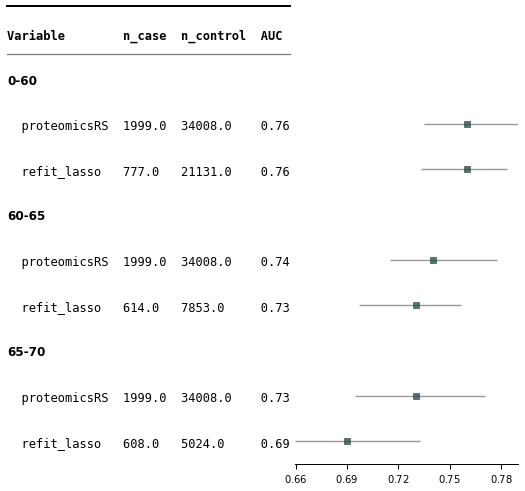

In [31]:
import forestplot as fp

plot_data = pd.concat([result, age_bin_refit_model_res])
annote_cols = ["n_case", "n_control", "AUC"]

plot_data["n_case"] = plot_data["n_case"].astype(int)
plot_data["n_control"] = plot_data["n_control"].astype(int)
plot_data["AUC"] = plot_data["AUC"].round(2)


fp.forestplot(
    dataframe=plot_data,
    estimate="AUC",
    ll="AUC_LCI",
    hl="AUC_UCI",
    varlabel="method",
    groupvar="age_bin",
    annote=["n_case", "n_control", "AUC"],
    annoteheaders=["n_case", "n_control", "AUC"],
    table=True,
)

In [8]:
lasso_dir = "/home/xutingfeng/ukb/project/ppp_prediction/result/part4/3_age_specific_prediction/model/model_lasso"

for age_bin in age_bin_list:
    model_dict = pd.read_pickle(f"{lasso_dir}/{age_bin}/{age_bin}.pkl")
    model = model_dict["model"]
    alpha = model["model"].alpha
    non_zero_coef_nums = (model["model"].coef_ != 0).sum()
    print(
        f"{age_bin}: alpha={alpha}, non_zero_coef_nums={non_zero_coef_nums} {model_dict['test_metrics']}"
    )

0-60: alpha=0.003593813663804626, non_zero_coef_nums=72 {'AUC': 0.7590454782988946, 'AUC_UCI': 0.7868862428074799, 'AUC_LCI': 0.7326366275027377, 'ACC': 0.7404818240481824, 'ACC_UCI': 0.7497338137233814, 'ACC_LCI': 0.7311195956119596, 'Macro_F1': 0.49257793643988557, 'Macro_F1_UCI': 0.5028371040024937, 'Macro_F1_LCI': 0.48303249336278853, 'Sensitivity': 0.6498316496128512, 'Sensitivity_UCI': 0.7023627163035683, 'Sensitivity_LCI': 0.5993304120807609, 'Specificity': 0.7434729474420233, 'Specificity_UCI': 0.7520325926055674, 'Specificity_LCI': 0.7345290454743807, 'APR': 0.1253864854581087, 'APR_UCI': 0.15325345763152606, 'APR_LCI': 0.08977462710943285}
60-65: alpha=0.003593813663804626, non_zero_coef_nums=303 {'AUC': 0.7276340856986018, 'AUC_UCI': 0.7568599613793159, 'AUC_LCI': 0.6972465969609977, 'ACC': 0.7043502355223054, 'ACC_UCI': 0.7187586589082848, 'ACC_LCI': 0.6893876420060959, 'Macro_F1': 0.5305310049931652, 'Macro_F1_UCI': 0.5479086064323643, 'Macro_F1_LCI': 0.5127098354821042, '

### cox

In [26]:
model["model"].coef_.shape

(2911,)

In [23]:
pd.DataFrame({"coef": model["model"].coef_, "feature": proteomics})

,coef,feature
0,0.000000,C3
1,0.000000,KLK7
2,0.000000,GCHFR
3,0.000000,NHLRC3
4,0.000000,APOD
...,...,...
2906,0.000000,VWF
2907,-0.001023,NOTCH3
2908,0.000000,CNTN1
2909,0.000000,ENG


In [51]:
# lasso_dir = "/home/xutingfeng/ukb/project/ppp_prediction/result/part4/3_age_specific_prediction/model/model_lasso"

# for age_bin in age_bin_list:
#     model_dict = pd.read_pickle(f"{lasso_dir}/{age_bin}/{age_bin}.pkl")
#     model = model_dict["model"]
#     alpha = model["model"].alpha
#     non_zero_coef_nums = (model["model"].coef_ != 0).sum()

#     to_cal = test_impute[test_impute["age_bin"] == age_bin]
#     test_pred = model.predict(to_cal[proteomics])
#     test_metrics = cal_binary_metrics_bootstrap(
#         to_cal["incident_cad"],
#         test_pred,
#         ci_kwargs={"n_resamples": 100},
#     )

#     print(
#         f"{age_bin}: alpha={alpha}, non_zero_coef_nums={non_zero_coef_nums} {test_metrics}"
#     )
#     break

659